In [440]:
# Import Libraries
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

#vizualization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

#Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from sklearn.preprocessing import StandardScaler #scale arrays
import multiprocessing #speed up computing
import os #saving & loading models

In [6]:
# Import Data
df = pd.read_csv('train.csv')

In [7]:
df.shape

(233154, 41)

In [8]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [9]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [6]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [7]:
# check data types
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [259]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [267]:
# MobileNo_Avl_Flag is useless col
df[['MobileNo_Avl_Flag']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MobileNo_Avl_Flag,233154.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [10]:
df.describe(include='object').transpose()

,count,unique,top,freq
Date.of.Birth,233154,15433,01-01-88,2173
Employment.Type,225493,2,Self employed,127635
DisbursalDate,233154,84,31-10-18,8826
PERFORM_CNS.SCORE.DESCRIPTION,233154,20,No Bureau History Available,116950
AVERAGE.ACCT.AGE,233154,192,0yrs 0mon,119373
CREDIT.HISTORY.LENGTH,233154,294,0yrs 0mon,119127


In [261]:
df['Employment.Type'].value_counts(ascending=False)

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [264]:
233154 - (127635+97858)

7661

In [265]:
df['Employment.Type'].fillna("No Record", inplace = True)
df['Employment.Type'].value_counts(ascending=False)

Self employed    127635
Salaried          97858
No Record          7661
Name: Employment.Type, dtype: int64

In [266]:
df.describe(include='object').transpose()

,count,unique,top,freq
Date.of.Birth,233154,15433,01-01-88,2173
Employment.Type,233154,3,Self employed,127635
DisbursalDate,233154,84,31-10-18,8826
PERFORM_CNS.SCORE.DESCRIPTION,233154,20,No Bureau History Available,116950
AVERAGE.ACCT.AGE,233154,192,0yrs 0mon,119373
CREDIT.HISTORY.LENGTH,233154,294,0yrs 0mon,119127


In [41]:
# bucket different types of features: ids (apply 1 hot encoding), numeric, categorial (apply 1 hot encoding, to date_time)

In [255]:
cat_cols = df.describe(include='object').transpose().index.tolist()
len(cat_cols), cat_cols

(6,
 ['Date.of.Birth',
  'Employment.Type',
  'DisbursalDate',
  'PERFORM_CNS.SCORE.DESCRIPTION',
  'AVERAGE.ACCT.AGE',
  'CREDIT.HISTORY.LENGTH'])

In [273]:
for col in cat_cols:
    print(col, ':','\n', df[col].value_counts(ascending=False), '\n')

# feature engineering: cal age: disbdate -dob, str to numeric for avg.acc.age & credit.hist.len

Date.of.Birth : 
 1988-01-01    2173
1990-01-01    2170
1987-01-01    2127
1986-01-01    2063
1985-01-01    2005
1991-01-01    1985
1989-01-01    1962
1993-01-01    1930
1992-01-01    1924
1995-01-01    1924
1994-01-01    1867
1983-01-01    1841
1980-01-01    1821
1984-01-01    1768
1981-01-01    1764
1996-01-01    1759
1982-01-01    1691
1978-01-01    1646
1975-01-01    1641
1997-01-01    1557
1976-01-01    1527
1977-01-01    1469
1979-01-01    1438
1973-01-01    1335
1974-01-01    1273
1970-01-01    1203
1971-01-01    1142
1972-01-01    1100
2068-01-01     911
1969-01-01     875
              ... 
2056-01-07       1
2058-09-21       1
2061-07-18       1
2063-04-16       1
2057-10-10       1
2060-06-06       1
2059-12-16       1
2056-12-23       1
2057-07-04       1
2058-10-02       1
2062-02-21       1
2060-08-24       1
2056-12-27       1
2061-07-22       1
2066-02-14       1
2055-05-10       1
1970-10-22       1
2056-07-11       1
2059-12-03       1
1969-12-29       1
2000-08-03   

In [271]:
df[['Date.of.Birth', 'DisbursalDate']].dtypes

Date.of.Birth    datetime64[ns]
DisbursalDate            object
dtype: object

In [287]:
# change data type for dates
df['Date.of.Birth'] = [pd.to_datetime(str(time)) for time in df['Date.of.Birth']]
df['DisbursalDate'] = [pd.to_datetime(str(time)) for time in df['DisbursalDate']]
df[['Date.of.Birth', 'DisbursalDate']].dtypes

Date.of.Birth    datetime64[ns]
DisbursalDate    datetime64[ns]
dtype: object

In [337]:
# feature engineering 1: Age
df['age'] = df['DisbursalDate'] - df['Date.of.Birth']
df['age'] = (round((df['age'].dt.days)/365.25)).astype(int)
df['age'] = [max(age,0) for age in df['age']]
df[['DisbursalDate', 'Date.of.Birth', 'age']].head(10)

,DisbursalDate,Date.of.Birth,age
0,2018-03-08,1984-01-01,34
1,2018-09-26,1985-07-31,33
2,2018-01-08,1985-08-24,32
3,2018-10-26,1993-12-30,25
4,2018-09-26,1977-09-12,41
5,2018-09-19,1990-08-09,28
6,2018-09-23,1988-01-06,31
7,2018-09-16,1989-04-10,29
8,2018-05-09,1991-11-15,26
9,2018-09-16,2068-01-06,0


In [316]:
import re
def format_duration(duration):
    year = int(duration.lower().split('yrs')[0])
    month = int(duration.lower().split('mon')[0].split()[-1])
    duration_formatted = int(year*12.0 + month)
    return duration_formatted
format_duration('1YRs 5 Mon')    

17

In [318]:
# feature engineering 3 & 4: format AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH in months
df['AVERAGE.ACCT.AGE'] = [format_duration(duration) for duration in df['AVERAGE.ACCT.AGE']]
df['CREDIT.HISTORY.LENGTH'] = [format_duration(duration) for duration in df['CREDIT.HISTORY.LENGTH']]
df[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].head(10)

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0,0
1,23,23
2,0,0
3,8,15
4,0,0
5,21,24
6,0,0
7,2,2
8,56,56
9,19,19


In [338]:
df[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].dtypes

AVERAGE.ACCT.AGE         int64
CREDIT.HISTORY.LENGTH    int64
dtype: object

In [331]:
df[['age','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH', 'loan_default']].corr()

,age,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,loan_default
age,1.000000,0.033291,0.035356,-0.004904
AVERAGE.ACCT.AGE,0.033291,1.000000,0.831952,-0.024781
CREDIT.HISTORY.LENGTH,0.035356,0.831952,1.000000,-0.042126
loan_default,-0.004904,-0.024781,-0.042126,1.000000


In [12]:
numeric_cols = []
id_cols = []
flag_cols = []
for cols in df.describe().transpose().index.tolist():
    if 'flag' in cols.lower():
        flag_cols.append(cols)
    elif 'id' in cols.lower() and cols not in flag_cols:
        id_cols.append(cols)
    else:
        numeric_cols.append(cols)
        
numeric_cols, id_cols, flag_cols

(['disbursed_amount',
  'asset_cost',
  'ltv',
  'PERFORM_CNS.SCORE',
  'PRI.NO.OF.ACCTS',
  'PRI.ACTIVE.ACCTS',
  'PRI.OVERDUE.ACCTS',
  'PRI.CURRENT.BALANCE',
  'PRI.SANCTIONED.AMOUNT',
  'PRI.DISBURSED.AMOUNT',
  'SEC.NO.OF.ACCTS',
  'SEC.ACTIVE.ACCTS',
  'SEC.OVERDUE.ACCTS',
  'SEC.CURRENT.BALANCE',
  'SEC.SANCTIONED.AMOUNT',
  'SEC.DISBURSED.AMOUNT',
  'PRIMARY.INSTAL.AMT',
  'SEC.INSTAL.AMT',
  'NEW.ACCTS.IN.LAST.SIX.MONTHS',
  'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
  'NO.OF_INQUIRIES',
  'loan_default'],
 ['UniqueID',
  'branch_id',
  'supplier_id',
  'manufacturer_id',
  'Current_pincode_ID',
  'State_ID',
  'Employee_code_ID'],
 ['MobileNo_Avl_Flag',
  'Aadhar_flag',
  'PAN_flag',
  'VoterID_flag',
  'Driving_flag',
  'Passport_flag'])

In [16]:
df[id_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,68315.693711,417428.0,476786.25,535978.5,595039.75,671084.0
branch_id,233154.0,72.936094,69.834995,1.0,14.00,61.0,130.00,261.0
supplier_id,233154.0,19638.635035,3491.949566,10524.0,16535.00,20333.0,23000.00,24803.0
manufacturer_id,233154.0,69.028054,22.141304,45.0,48.00,86.0,86.00,156.0
Current_pincode_ID,233154.0,3396.880247,2238.147502,1.0,1511.00,2970.0,5677.00,7345.0
State_ID,233154.0,7.262243,4.482230,1.0,4.00,6.0,10.00,22.0
Employee_code_ID,233154.0,1549.477148,975.261278,1.0,713.00,1451.0,2362.00,3795.0


In [17]:
for col in id_cols:
    print(col, ':','\n', df[col].value_counts(ascending=False), '\n')


UniqueID : 
 526335    1
426629    1
520875    1
522922    1
516777    1
518824    1
496295    1
498342    1
492197    1
494244    1
504483    1
506530    1
500385    1
502432    1
422555    1
424602    1
418457    1
420504    1
447119    1
449166    1
443021    1
445068    1
455307    1
457354    1
451209    1
453256    1
430727    1
510636    1
508589    1
514734    1
         ..
496728    1
439420    1
435326    1
629913    1
603276    1
627864    1
650391    1
648342    1
652436    1
642195    1
640146    1
646289    1
644240    1
601231    1
599182    1
605325    1
593035    1
437375    1
590986    1
597129    1
595080    1
617607    1
615558    1
621701    1
619652    1
609411    1
607362    1
613505    1
611456    1
524288    1
Name: UniqueID, Length: 233154, dtype: int64 

branch_id : 
 2      13138
67     11328
3       9230
5       9218
36      8832
136     7833
34      7794
16      6466
19      5860
1       5709
146     5376
18      5032
152     4933
61      4906
48      4725

In [19]:
df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
PERFORM_CNS.SCORE,233154.0,289.462994,3.383748e+02,0.00,0.00,0.0,678.00,8.900000e+02
PRI.NO.OF.ACCTS,233154.0,2.440636,5.217233e+00,0.00,0.00,0.0,3.00,4.530000e+02
PRI.ACTIVE.ACCTS,233154.0,1.039896,1.941496e+00,0.00,0.00,0.0,1.00,1.440000e+02
PRI.OVERDUE.ACCTS,233154.0,0.156549,5.487867e-01,0.00,0.00,0.0,0.00,2.500000e+01
PRI.CURRENT.BALANCE,233154.0,165900.076936,9.422736e+05,-6678296.00,0.00,0.0,35006.50,9.652492e+07
PRI.SANCTIONED.AMOUNT,233154.0,218503.855323,2.374794e+06,0.00,0.00,0.0,62500.00,1.000000e+09
PRI.DISBURSED.AMOUNT,233154.0,218065.898655,2.377744e+06,0.00,0.00,0.0,60800.00,1.000000e+09


In [104]:
df[numeric_cols].describe().disbursed_amount[-2]

60413.0

In [18]:
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt

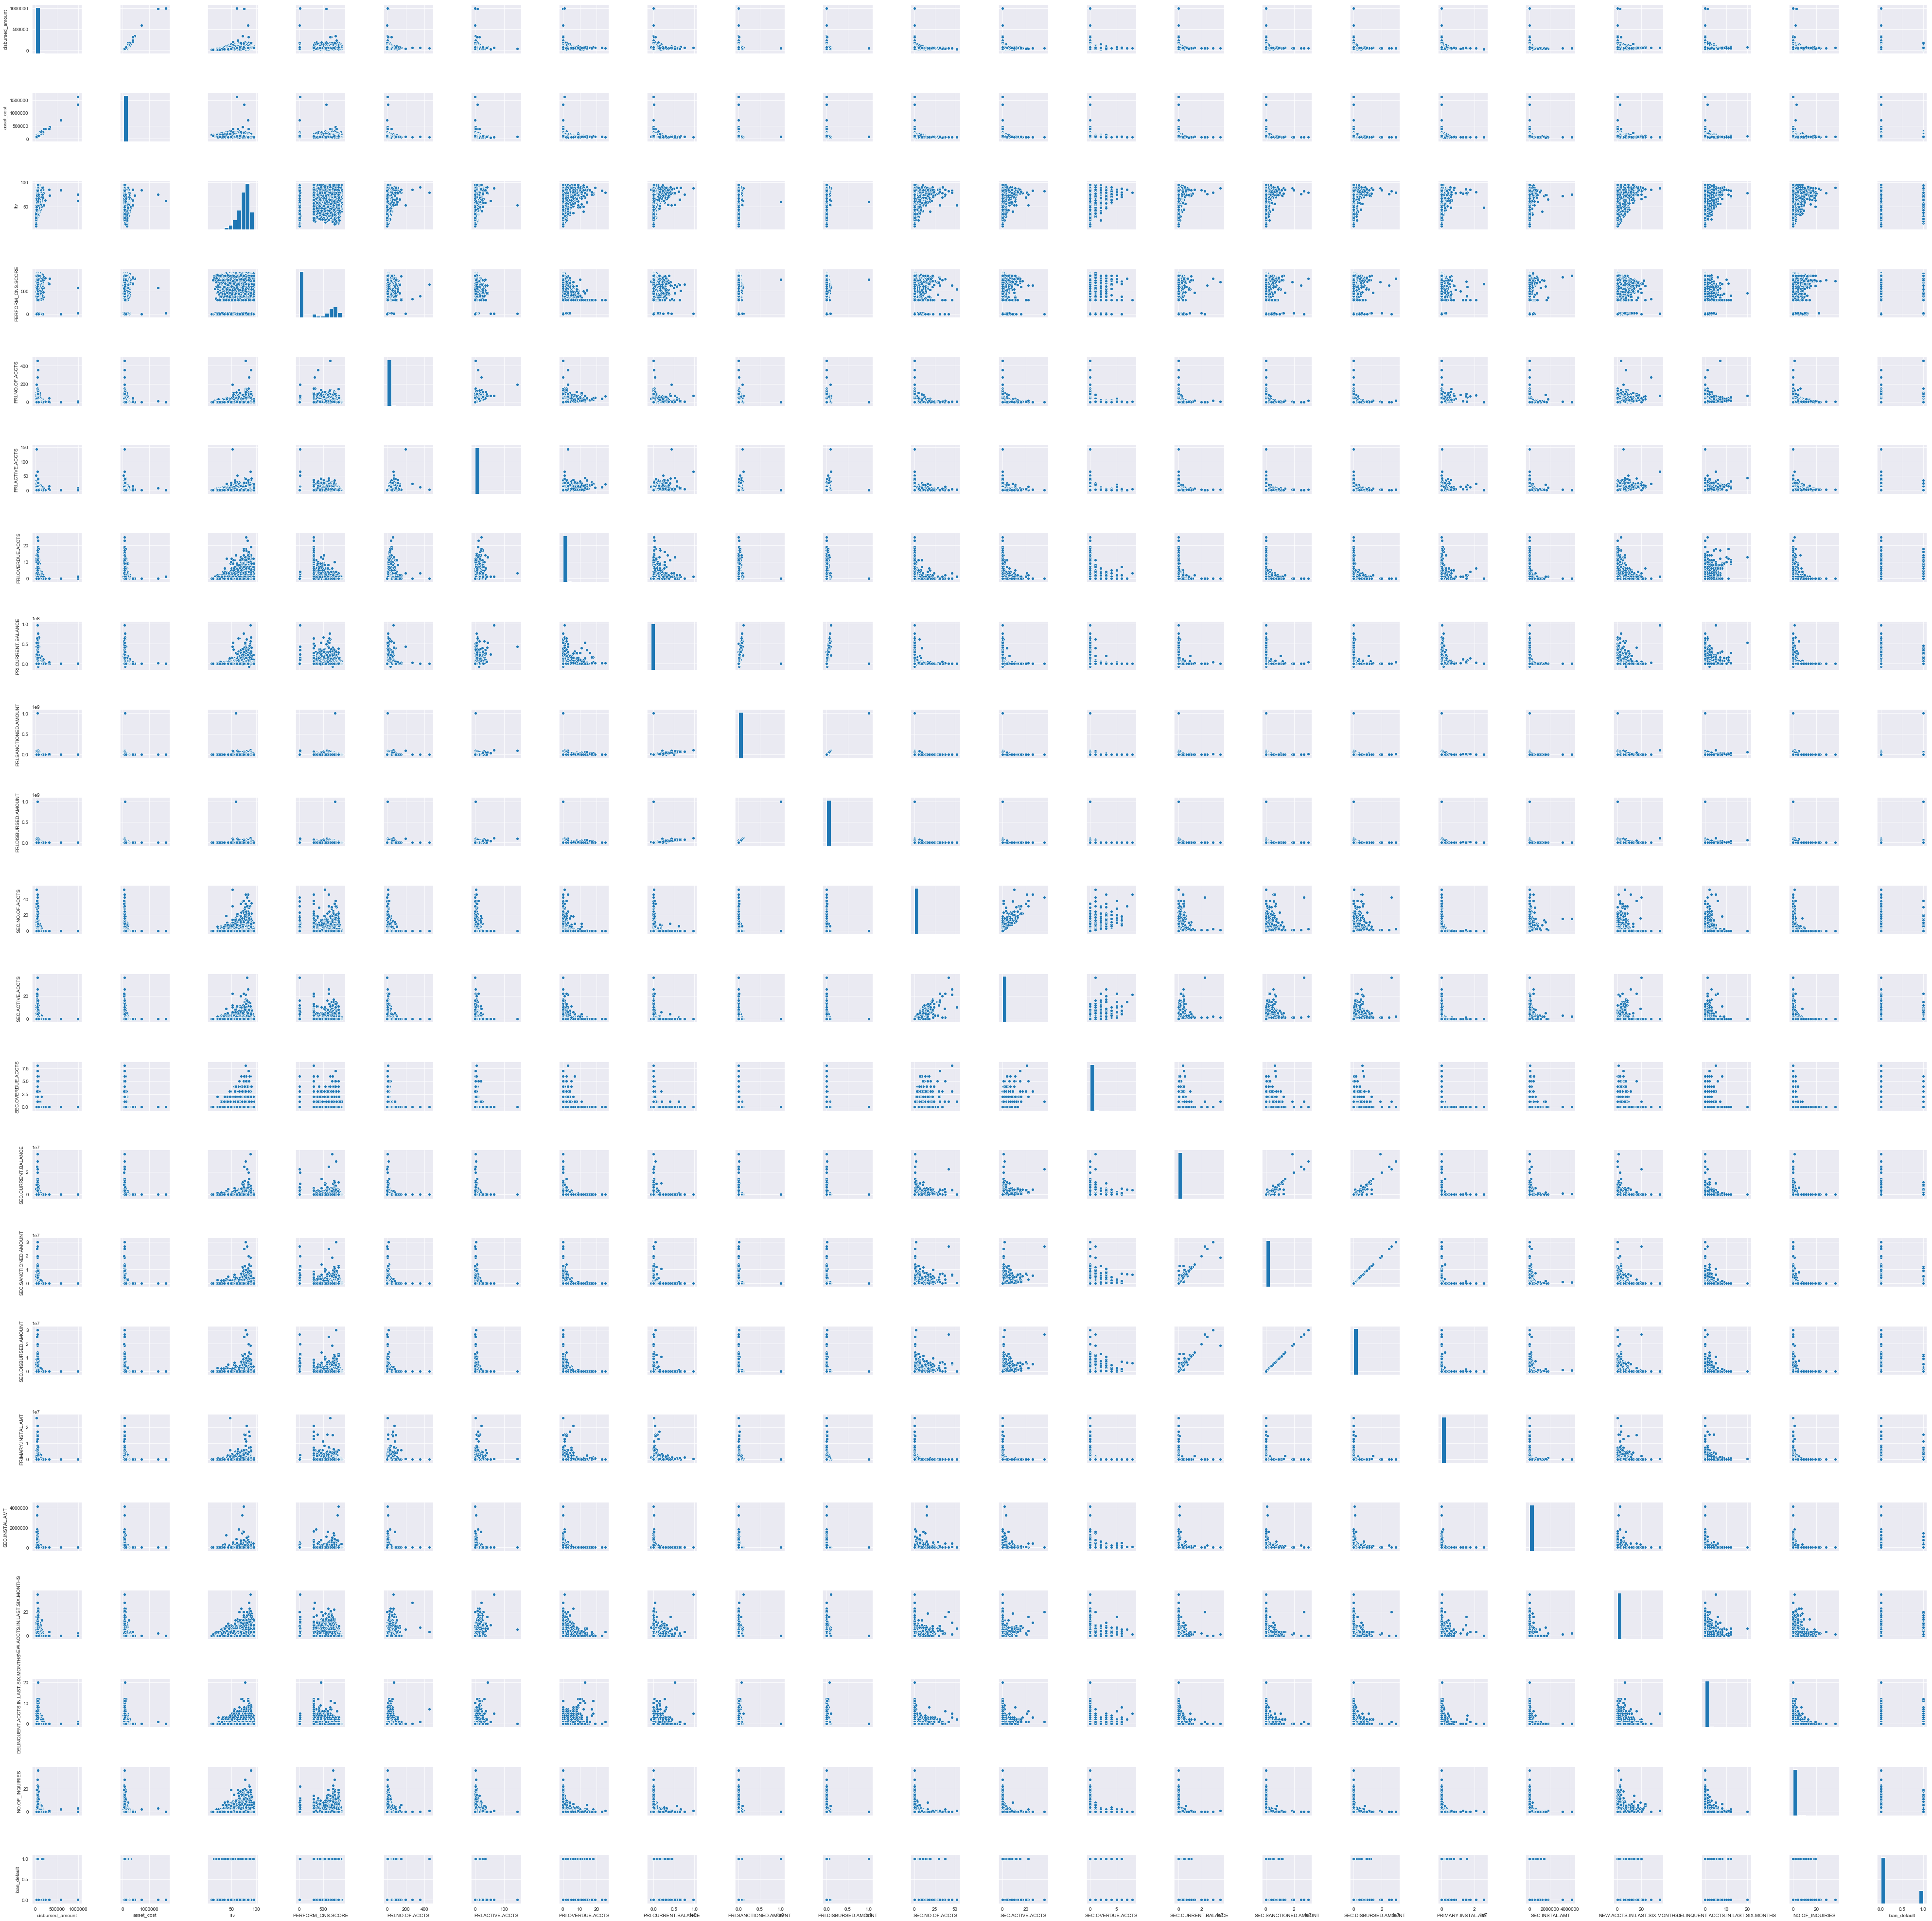

In [13]:
# seaborn, correl
sns.pairplot(df[numeric_cols])

In [29]:
for col in df[numeric_cols].corr().columns:
    print(df[numeric_cols].corr()[col].sort_values(ascending = False))

disbursed_amount                       1.000000
asset_cost                             0.752668
ltv                                    0.376747
loan_default                           0.077675
PRI.ACTIVE.ACCTS                       0.039542
NO.OF_INQUIRIES                        0.038513
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.035880
PRI.NO.OF.ACCTS                        0.034461
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.020198
PRI.OVERDUE.ACCTS                      0.019422
PRI.CURRENT.BALANCE                    0.015713
PERFORM_CNS.SCORE                      0.011409
PRI.DISBURSED.AMOUNT                   0.006412
PRI.SANCTIONED.AMOUNT                  0.006294
PRIMARY.INSTAL.AMT                     0.002350
SEC.CURRENT.BALANCE                   -0.004227
SEC.DISBURSED.AMOUNT                  -0.005119
SEC.SANCTIONED.AMOUNT                 -0.005271
SEC.INSTAL.AMT                        -0.005525
SEC.OVERDUE.ACCTS                     -0.007305
SEC.ACTIVE.ACCTS                      -0

PRI.SANCTIONED.AMOUNT                  1.000000
PRI.DISBURSED.AMOUNT                   0.998747
PRI.CURRENT.BALANCE                    0.464729
PRI.ACTIVE.ACCTS                       0.219774
PRI.NO.OF.ACCTS                        0.158455
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.122028
PRI.OVERDUE.ACCTS                      0.116278
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.095074
PERFORM_CNS.SCORE                      0.079102
PRIMARY.INSTAL.AMT                     0.072591
SEC.NO.OF.ACCTS                        0.013162
SEC.SANCTIONED.AMOUNT                  0.011859
SEC.DISBURSED.AMOUNT                   0.011843
SEC.CURRENT.BALANCE                    0.010750
NO.OF_INQUIRIES                        0.010743
ltv                                    0.009955
SEC.ACTIVE.ACCTS                       0.009669
SEC.OVERDUE.ACCTS                      0.007967
disbursed_amount                       0.006294
SEC.INSTAL.AMT                         0.003883
asset_cost                            -0

PRIMARY.INSTAL.AMT                     1.000000
PRI.NO.OF.ACCTS                        0.269546
PRI.ACTIVE.ACCTS                       0.192397
PRI.CURRENT.BALANCE                    0.152499
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.127796
PRI.OVERDUE.ACCTS                      0.103095
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.090364
PRI.DISBURSED.AMOUNT                   0.073058
PRI.SANCTIONED.AMOUNT                  0.072591
PERFORM_CNS.SCORE                      0.071309
SEC.DISBURSED.AMOUNT                   0.011469
SEC.SANCTIONED.AMOUNT                  0.011448
SEC.INSTAL.AMT                         0.010849
SEC.CURRENT.BALANCE                    0.010393
SEC.NO.OF.ACCTS                        0.009986
NO.OF_INQUIRIES                        0.008967
ltv                                    0.007358
SEC.ACTIVE.ACCTS                       0.007063
disbursed_amount                       0.002350
SEC.OVERDUE.ACCTS                      0.002066
asset_cost                            -0

In [36]:
# top 20 correl
var1 = []
var2 = []
correl = []
df1 = df[numeric_cols].corr()

for col in df1.columns:
#     print(col)
    for ind in df1.index:
#         print('-----',ind)
        if col!= ind:
            var1.append(col)
            var2.append(ind)
            correl.append(df1[col][ind])
df2 = pd.DataFrame({'var1': var1,
                   'var2': var2,
                   'correl': correl}).reset_index(drop=True)
df2.head()

,var1,var2,correl
0,disbursed_amount,asset_cost,0.752668
1,disbursed_amount,ltv,0.376747
2,disbursed_amount,PERFORM_CNS.SCORE,0.011409
3,disbursed_amount,PRI.NO.OF.ACCTS,0.034461
4,disbursed_amount,PRI.ACTIVE.ACCTS,0.039542


In [37]:
df1.shape

(22, 22)

In [39]:
df2.shape, 21*22

((462, 3), 462)

In [47]:
# sort the df and drop duplicates
df2 = df2.sort_values('correl', ascending=False)
df3= df2.drop_duplicates(subset='correl', keep='first')

In [48]:
df2.shape, df3.shape

((462, 3), (231, 3))

In [64]:
df3[(df3.var1 == 'loan_default')|(df3.var2 == 'loan_default')].describe()

,correl
count,21.000000
mean,0.002335
std,0.038121
min,-0.057929
25%,-0.011304
50%,-0.006248
75%,0.014261
max,0.098208


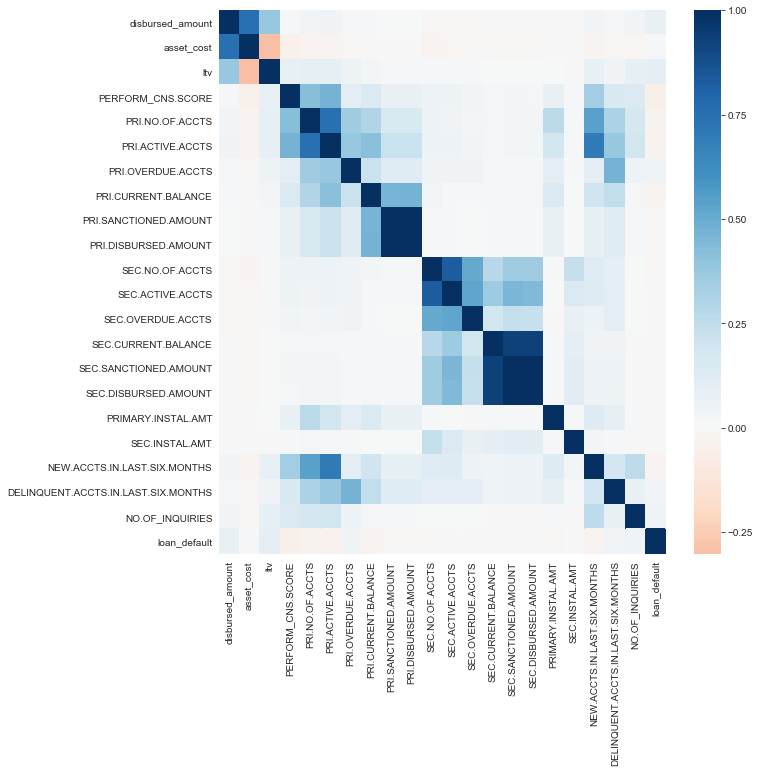

In [249]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df[numeric_cols].corr(), ax=ax, cmap ='RdBu', center = 0.0)

In [155]:
threshold = 0.3
df_correlated = pd.concat([df3[df3.correl>threshold],df3[df3.correl<-threshold]]).reset_index(drop=True)
df_correlated

,var1,var2,correl
0,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,0.999646
1,PRI.DISBURSED.AMOUNT,PRI.SANCTIONED.AMOUNT,0.998747
2,SEC.CURRENT.BALANCE,SEC.DISBURSED.AMOUNT,0.929995
3,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,0.929196
4,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,0.828727
5,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,0.753565
6,disbursed_amount,asset_cost,0.752668
7,PRI.ACTIVE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,0.702943
8,NEW.ACCTS.IN.LAST.SIX.MONTHS,PRI.NO.OF.ACCTS,0.537622
9,SEC.OVERDUE.ACCTS,SEC.ACTIVE.ACCTS,0.526209


In [321]:
#
select = ['SEC.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 
         'PRI.NO.OF.ACCTS', 'disbursed_amount','SEC.OVERDUE.ACCTS', 'age','AVERAGE.ACCT.AGE']

unselect =['SEC.DISBURSED.AMOUNT', 'PRI.SANCTIONED.AMOUNT', 'SEC.ACTIVE.ACCTS',
          'PRI.ACTIVE.ACCTS', 'asset_cost', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
          'PERFORM_CNS.SCORE', 'ltv', 'SEC.NO.OF.ACCTS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
          'SEC.CURRENT.BALANCE', 'NEW.ACCTS.IN.LAST.SIX.MONTHS']
len(select), len(unselect), set(select)&set(unselect)

(7, 13, set())

In [322]:
df_low_correl = df3[(df3.correl<threshold) & (df3.correl>-threshold)]
varlist = sorted(list(set(df_low_correl.var1.tolist()+df_low_correl.var2.tolist())))
len(varlist)

22

In [323]:
#what in varlist not in select or unselect, goes in select
new = []
for var in varlist:
    if (var not in select) & (var not in unselect):
        new.append(var)
len(new), new

(4,
 ['NO.OF_INQUIRIES', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'loan_default'])

In [324]:
selected_cont_vars = select + new
len(selected_cont_vars), selected_cont_vars, len(select)

(11,
 ['SEC.SANCTIONED.AMOUNT',
  'PRI.DISBURSED.AMOUNT',
  'PRI.NO.OF.ACCTS',
  'disbursed_amount',
  'SEC.OVERDUE.ACCTS',
  'age',
  'AVERAGE.ACCT.AGE',
  'NO.OF_INQUIRIES',
  'PRIMARY.INSTAL.AMT',
  'SEC.INSTAL.AMT',
  'loan_default'],
 7)

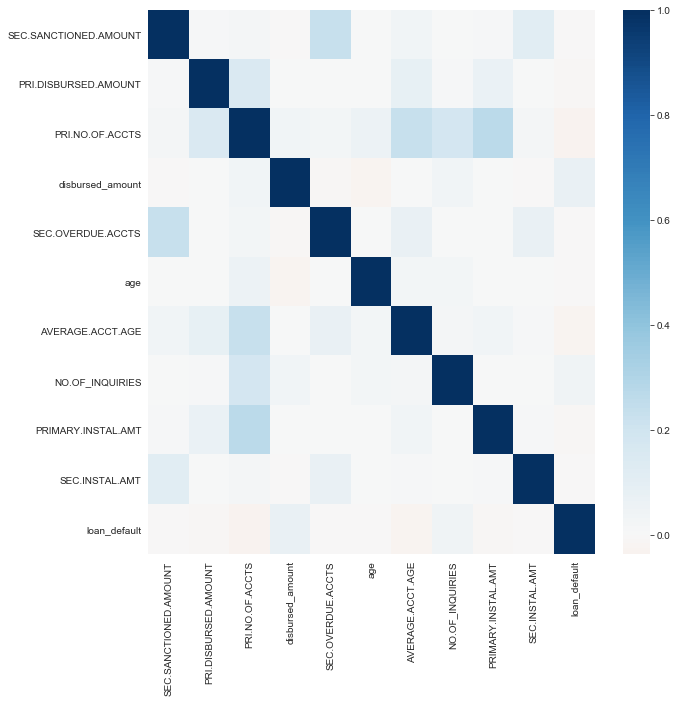

In [332]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df[selected_cont_vars].corr(), ax=ax, cmap ='RdBu', center = 0.0)

In [333]:
df[selected_cont_vars].corr()

,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,SEC.OVERDUE.ACCTS,age,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,loan_default
SEC.SANCTIONED.AMOUNT,1.000000,0.011771,0.024877,-0.005271,0.234422,0.005401,0.037574,0.002675,0.011448,0.113395,-0.006354
PRI.DISBURSED.AMOUNT,0.011771,1.000000,0.157952,0.006412,0.007872,0.006390,0.083373,0.010935,0.073058,0.003806,-0.011155
PRI.NO.OF.ACCTS,0.024877,0.157952,1.000000,0.034461,0.030364,0.065481,0.234612,0.180744,0.269546,0.023421,-0.035456
disbursed_amount,-0.005271,0.006412,0.034461,1.000000,-0.007305,-0.025626,0.004205,0.038513,0.002350,-0.005525,0.077675
SEC.OVERDUE.ACCTS,0.234422,0.007872,0.030364,-0.007305,1.000000,0.001632,0.075291,0.004975,0.002066,0.077731,-0.001371
age,0.005401,0.006390,0.065481,-0.025626,0.001632,1.000000,0.033291,0.032874,0.004258,0.001785,-0.004904
AVERAGE.ACCT.AGE,0.037574,0.083373,0.234612,0.004205,0.075291,0.033291,1.000000,0.024883,0.039689,0.012456,-0.024781
NO.OF_INQUIRIES,0.002675,0.010935,0.180744,0.038513,0.004975,0.032874,0.024883,1.000000,0.008967,0.002736,0.043678
PRIMARY.INSTAL.AMT,0.011448,0.073058,0.269546,0.002350,0.002066,0.004258,0.039689,0.008967,1.000000,0.010849,-0.010616
SEC.INSTAL.AMT,0.113395,0.003806,0.023421,-0.005525,0.077731,0.001785,0.012456,0.002736,0.010849,1.000000,-0.001548


In [334]:
# why remove 0? 
df[selected_cont_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SEC.SANCTIONED.AMOUNT,233154.0,7295.923347,1.831560e+05,0.0,0.0,0.0,0.0,3.000000e+07
PRI.DISBURSED.AMOUNT,233154.0,218065.898655,2.377744e+06,0.0,0.0,0.0,60800.0,1.000000e+09
PRI.NO.OF.ACCTS,233154.0,2.440636,5.217233e+00,0.0,0.0,0.0,3.0,4.530000e+02
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.0,47145.0,53803.0,60413.0,9.905720e+05
SEC.OVERDUE.ACCTS,233154.0,0.007244,1.110789e-01,0.0,0.0,0.0,0.0,8.000000e+00
age,233154.0,29.866908,1.191642e+01,0.0,24.0,30.0,38.0,5.000000e+01
AVERAGE.ACCT.AGE,233154.0,8.915764,1.510642e+01,0.0,0.0,0.0,13.0,3.690000e+02
NO.OF_INQUIRIES,233154.0,0.206615,7.064977e-01,0.0,0.0,0.0,0.0,3.600000e+01
PRIMARY.INSTAL.AMT,233154.0,13105.481720,1.513679e+05,0.0,0.0,0.0,1999.0,2.564281e+07
SEC.INSTAL.AMT,233154.0,323.268449,1.555369e+04,0.0,0.0,0.0,0.0,4.170901e+06


In [335]:
# numeric_cols
input_cols = selected_cont_vars

SEC.SANCTIONED.AMOUNT <class 'str'>
before 0 removal: (233154, 2) correl: -0.006354322475337939
after 0 removal: (3736, 2) correl: -0.03270139732036325
PRI.DISBURSED.AMOUNT <class 'str'>
before 0 removal: (233154, 2) correl: -0.011155496035783105
after 0 removal: (94950, 2) correl: -0.01316323619231579
PRI.NO.OF.ACCTS <class 'str'>
before 0 removal: (233154, 2) correl: -0.03545584641052659
after 0 removal: (116204, 2) correl: -0.03156728684714482
disbursed_amount <class 'str'>
before 0 removal: (233154, 2) correl: 0.07767492189723994
after 0 removal: (233154, 2) correl: 0.07767492189723994
SEC.OVERDUE.ACCTS <class 'str'>
before 0 removal: (233154, 2) correl: -0.0013705699966467815
after 0 removal: (1337, 2) correl: 0.027056840695602973
age <class 'str'>
before 0 removal: (233154, 2) correl: -0.0049041016373881086
after 0 removal: (213288, 2) correl: -0.030806381952049322
AVERAGE.ACCT.AGE <class 'str'>
before 0 removal: (233154, 2) correl: -0.024780861851449894
after 0 removal: (113781,

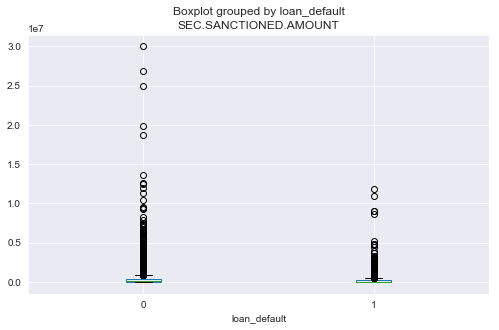

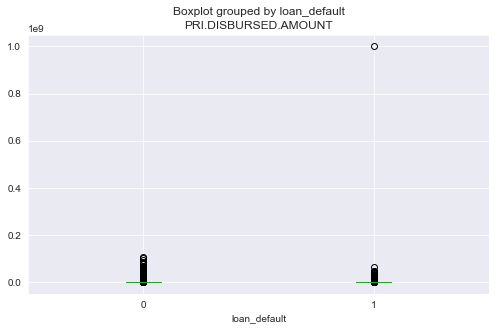

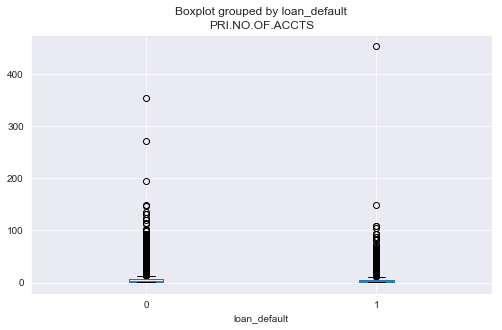

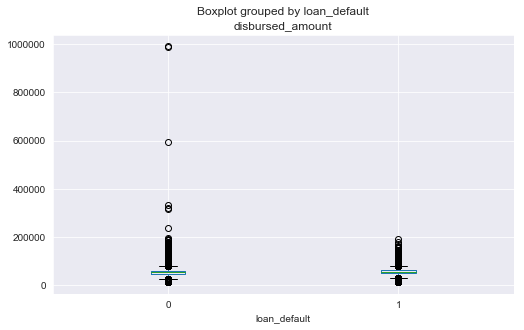

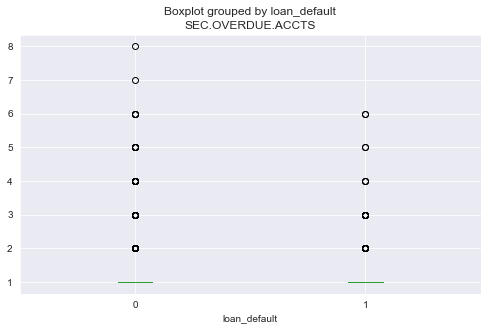

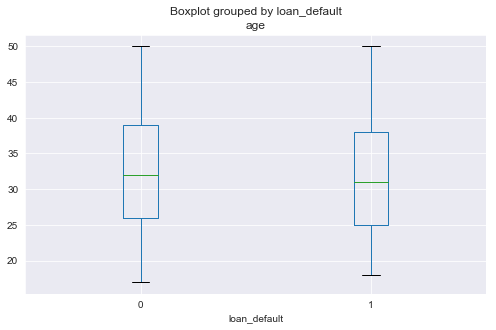

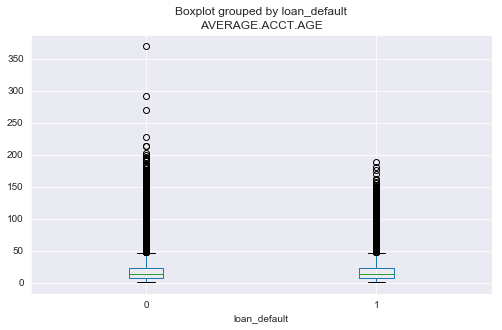

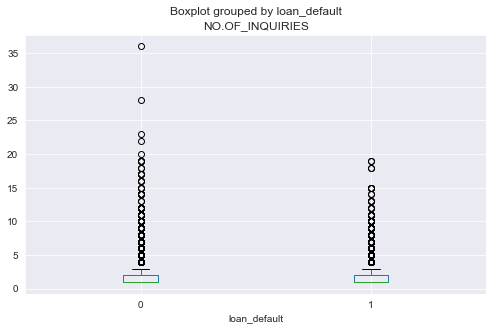

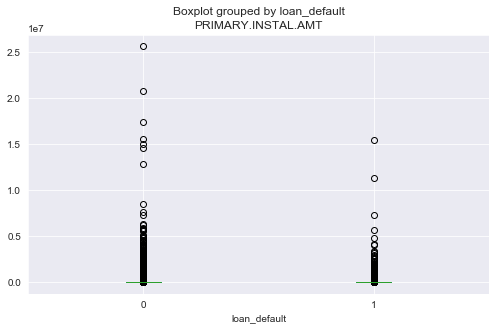

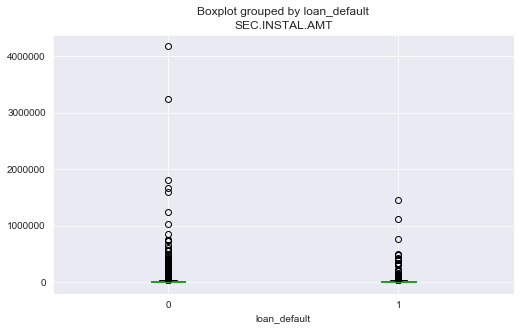

In [336]:
# have a closer look at different subset of data where differences are obvious
for col in input_cols:
    if col != 'loan_default':
        print(col, type(col))
#         print(df[[col, 'loan_default']].head())
        df_temp = df[[col, 'loan_default']]
        print('before 0 removal:',df_temp.shape, 'correl:', df_temp.corr()[col]['loan_default'])
#         print('before 0 removal:',df_temp.shape, 'correl:', df_temp.corr()[col]['loan_default'], '\nstats:', df_temp.describe().transpose(),'\n')        
#         print(df_temp.shape)
#         print(df_temp[col].describe().index[-2], df_temp.describe()[col][-2])

        # remove 0
        df_temp = df_temp[df_temp[col] != 0]
        print('after 0 removal:',df_temp.shape,'correl:', df_temp.corr()[col]['loan_default'])
#         print('after 0 removal:',df_temp.shape,'correl:', df_temp.corr()[col]['loan_default'], '\nstats:', df_temp.describe().transpose(),'\n')    
#         print(df_temp[col].describe().index[-2], df_temp.describe()[col][-2])

        # subset data by layer: study (layer 4, above 75), (layer 1, bet 25 n 75)
        layer = 0
        for i in range(layer):
            # check for differences above 75th
#             df_temp = df_temp[df_temp[col] > df_temp.describe()[col][-2]]

            # check for differences between 25th and 75th
            df_temp = df_temp[(df_temp[col] > df_temp.describe()[col][-4]) & (df_temp[col] < df_temp.describe()[col][-2])]
           
            print('layer:',i, 'shape:',df_temp.shape, 'correl:', df_temp.corr()[col]['loan_default'])
#             print('layer:',i, 'shape:',df_temp.shape, 'correl:', df_temp.corr()[col]['loan_default'],'\nstats:', df_temp.describe().transpose(),'\n')
            
        
        if df_temp.shape[0] != 0:
#             df_temp.hist(column= col, by= 'loan_default', figsize=(10,6), bins = 100);
#             pl.suptitle(col)
            df_temp.boxplot(column= col, by='loan_default', showfliers= True, figsize=(8,4.8));

In [339]:
# flag var analysis (confusion-matrix)
from sklearn.metrics import confusion_matrix

In [344]:
flag_cols.remove('MobileNo_Avl_Flag')

In [345]:
flag_cols

['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']

In [350]:
target = df['loan_default']

for col in flag_cols:
    
    print('***',col,'***\n',confusion_matrix(target, df[col],[0,1]))

*** Aadhar_flag ***
 [[ 27684 154859]
 [  9546  41065]]
*** PAN_flag ***
 [[168799  13744]
 [ 46734   3877]]
*** VoterID_flag ***
 [[157565  24978]
 [ 41795   8816]]
*** Driving_flag ***
 [[178216   4327]
 [ 49519   1092]]
*** Passport_flag ***
 [[182121    422]
 [ 50537     74]]


In [368]:
df[(df['loan_default']==0) & (df['Aadhar_flag']==0)].shape

(27684, 42)

In [420]:
cat_cols2 = ['branch_id', 'supplier_id','manufacturer_id','Current_pincode_ID','State_ID',
             'Employee_code_ID','Employment.Type' , 'PERFORM_CNS.SCORE.DESCRIPTION']

In [ ]:
df[['loan_default']].describe().transpose()

In [413]:
grouped=df.groupby('Current_pincode_ID')['loan_default'].agg(['sum','count','mean'])
grouped1=grouped.sort_values(ascending=False, by= 'count')
grouped2=grouped1[grouped1['count']>99].sort_values(ascending=False, by= 'mean')
grouped3=grouped2[grouped1['mean']>0.217071].sort_values(ascending=False, by= 'mean')
grouped3.tail()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,sum,count,mean
Current_pincode_ID,,,
6,22,100,0.220000
994,28,128,0.218750
1656,26,119,0.218487
3359,64,294,0.217687
475,110,506,0.217391


In [414]:
# There are 241 levels of current_pincode_ID that shows high relationship with defaulters 
# (one hot Encoding, then, PCA to reduce dimensions)
grouped3.shape

(241, 3)

In [410]:
grouped3.index

Int64Index([6874, 2605, 6882, 6875, 6701, 6879, 5732, 5710, 6885, 6883,
            ...
            1934,  820, 1694, 4607, 2238,    6,  994, 1656, 3359,  475],
           dtype='int64', name='Current_pincode_ID', length=241)

In [436]:
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys



*** branch_id ***

 # levels: 37 
head:
             sum  count      mean
branch_id                       
251        1322   3844  0.343913
254         551   1699  0.324308
97          122    389  0.313625
36         2621   8832  0.296762
78          636   2182  0.291476 

tail:
             sum  count      mean
branch_id                       
261          39    176  0.221591
202         440   1999  0.220110
79          751   3413  0.220041
136        1721   7833  0.219711
159         597   2725  0.219083


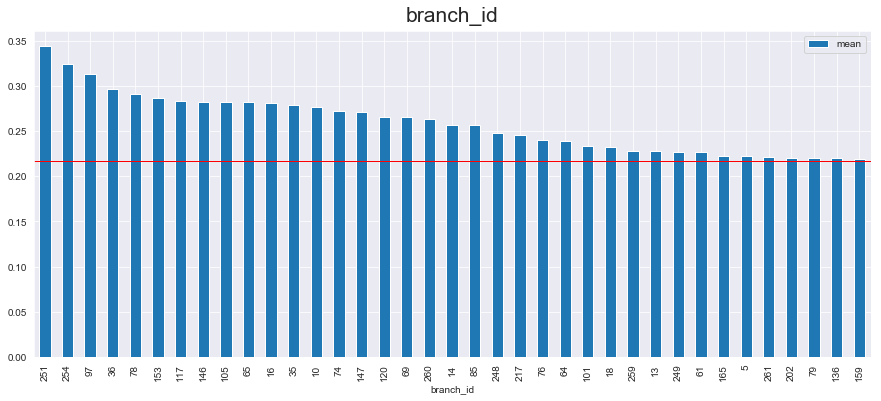


*** supplier_id ***

 # levels: 277 
head:
              sum  count      mean
supplier_id                      
22994        341    610  0.559016
23150         57    105  0.542857
22127         60    125  0.480000
17436         73    171  0.426901
21242         75    176  0.426136 

tail:
              sum  count      mean
supplier_id                      
16739         22    101  0.217822
16611         27    124  0.217742
18732         70    322  0.217391
22874         30    138  0.217391
18714         63    290  0.217241


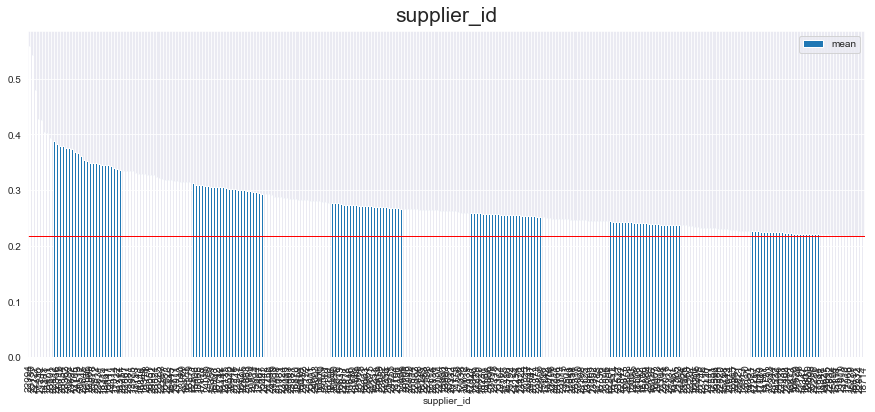


*** manufacturer_id ***

 # levels: 5 
head:
                    sum  count      mean
manufacturer_id                        
48                4554  16710  0.272531
45               12939  56626  0.228499
120               2132   9658  0.220750
49                2236  10220  0.218787
67                 523   2405  0.217464 

tail:
                    sum  count      mean
manufacturer_id                        
48                4554  16710  0.272531
45               12939  56626  0.228499
120               2132   9658  0.220750
49                2236  10220  0.218787
67                 523   2405  0.217464


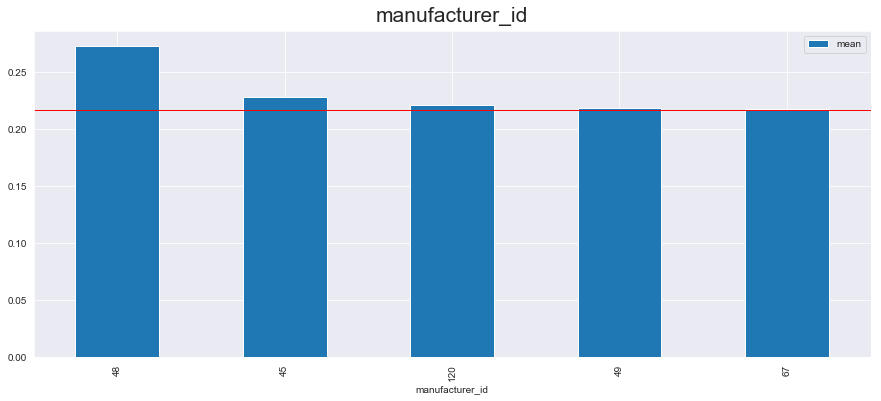


*** Current_pincode_ID ***

 # levels: 241 
head:
                     sum  count      mean
Current_pincode_ID                      
6874                 91    183  0.497268
2605                 48    104  0.461538
6882                 72    157  0.458599
6875                123    270  0.455556
6701                 80    178  0.449438 

tail:
                     sum  count      mean
Current_pincode_ID                      
6                    22    100  0.220000
994                  28    128  0.218750
1656                 26    119  0.218487
3359                 64    294  0.217687
475                 110    506  0.217391


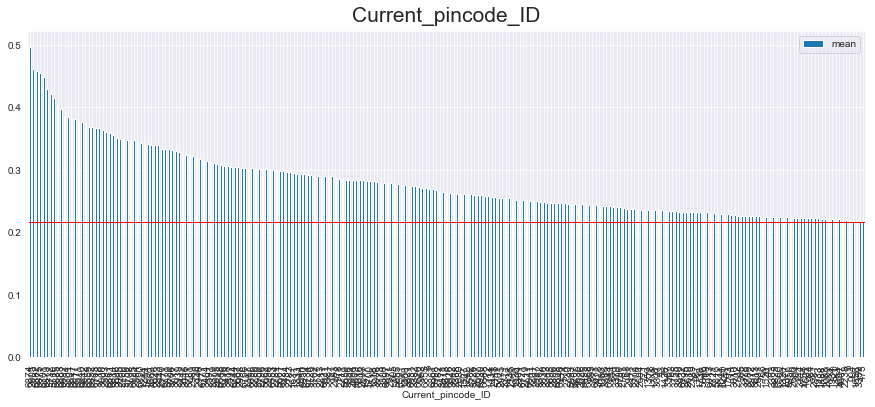


*** State_ID ***

 # levels: 8 
head:
            sum  count      mean
State_ID                       
13        5483  17884  0.306587
14        2597   9414  0.275866
2         1129   4160  0.271394
12        1118   4210  0.265558
17         981   3991  0.245803 

tail:
            sum  count      mean
State_ID                       
12        1118   4210  0.265558
17         981   3991  0.245803
8         3258  14197  0.229485
18        1191   5412  0.220067
9         3492  16022  0.217950


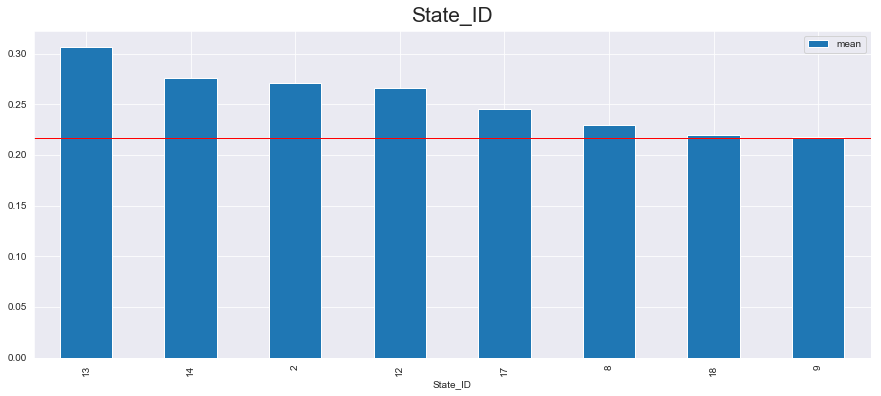


*** Employee_code_ID ***

 # levels: 363 
head:
                   sum  count      mean
Employee_code_ID                      
2546              348    628  0.554140
610                84    179  0.469274
3                  66    149  0.442953
1070               96    217  0.442396
1485               65    148  0.439189 

tail:
                   sum  count      mean
Employee_code_ID                      
2798               22    101  0.217822
394                66    303  0.217822
167                32    147  0.217687
628                62    285  0.217544
869                25    115  0.217391


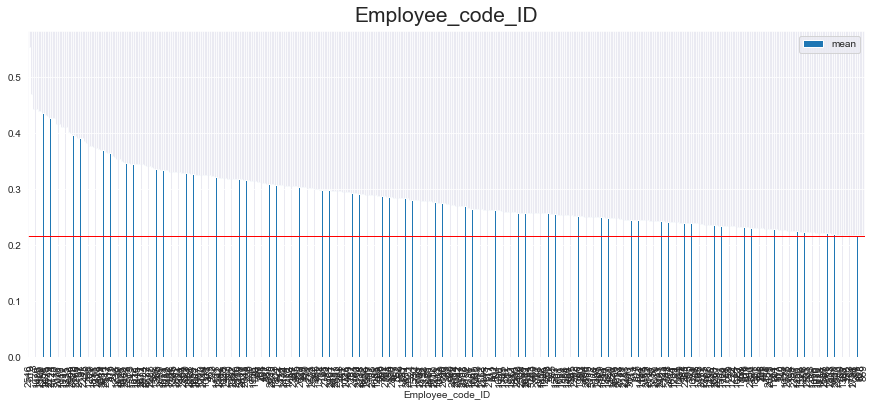


*** Employment.Type ***

 # levels: 1 
head:
                    sum   count      mean
Employment.Type                         
Self employed    29057  127635  0.227657 

tail:
                    sum   count      mean
Employment.Type                         
Self employed    29057  127635  0.227657


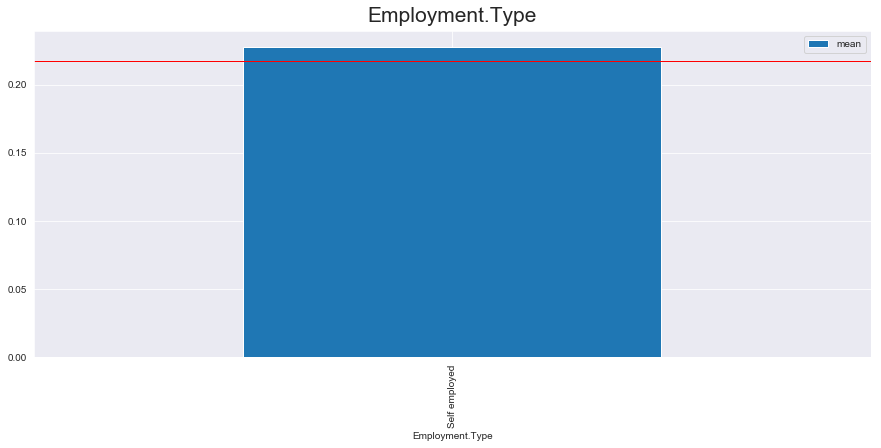


*** PERFORM_CNS.SCORE.DESCRIPTION ***

 # levels: 8 
head:
                                                sum  count      mean
PERFORM_CNS.SCORE.DESCRIPTION                                      
M-Very High Risk                              2673   8776  0.304581
L-Very High Risk                               318   1134  0.280423
K-High Risk                                   2302   8277  0.278120
I-Medium Risk                                 1515   5557  0.272629
Not Scored: Sufficient History Not Available   963   3765  0.255777 

tail:
                                                 sum   count      mean
PERFORM_CNS.SCORE.DESCRIPTION                                        
I-Medium Risk                                  1515    5557  0.272629
Not Scored: Sufficient History Not Available    963    3765  0.255777
J-High Risk                                     946    3748  0.252401
H-Medium Risk                                  1658    6855  0.241867
No Bureau History Available       

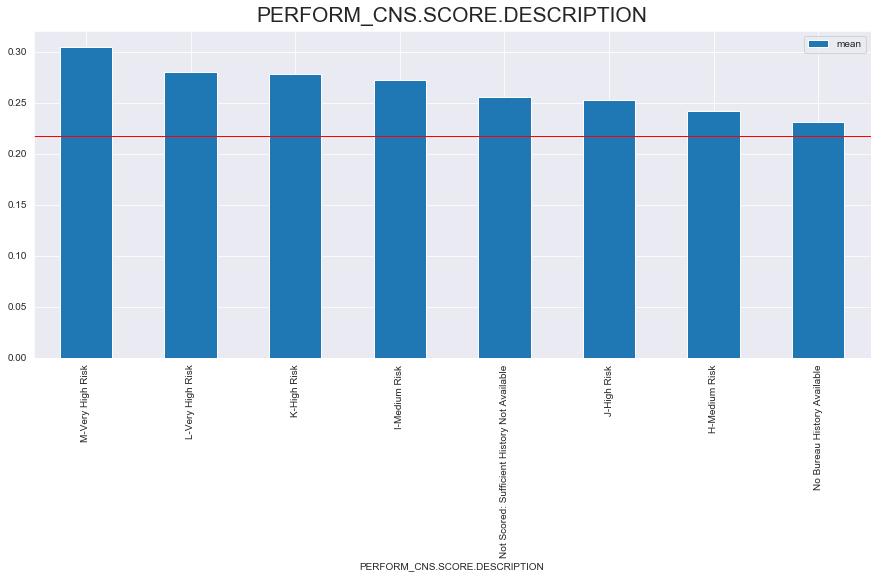

In [439]:
threshold = 0.217071
for col in cat_cols2:
    try:
        grouped=df.groupby(col)['loan_default'].agg(['sum','count','mean'])
        grouped1=grouped.sort_values(ascending=False, by= 'count')
        grouped2=grouped1[grouped1['count']>99].sort_values(ascending=False, by= 'mean')
        grouped3=grouped2[grouped1['mean']>threshold].sort_values(ascending=False, by= 'mean')
        print('\n***',col,'***\n\n','# levels:',grouped3.shape[0], '\nhead:\n',grouped3.head(),'\n\ntail:\n',grouped3.tail())
        

        ax = grouped3[['mean']].plot(kind='bar', figsize=(15,6));
        ax.set_title(col, fontsize=21, y=1.01);
        # horizontal line indicating the threshold
        plt.axhline(y=threshold,linewidth=1, color='r')
        plt.show();
        
    except:
        print('\n***',col,'***\n\n')

In [423]:
df.groupby('Employment.Type')['loan_default'].agg(['sum','count','mean'])

,sum,count,mean
Employment.Type,,,
No Record,1644,7661,0.214593
Salaried,19910,97858,0.203458
Self employed,29057,127635,0.227657


In [541]:
# Selected features: 'Aadhar_flag','VoterID_flag'
selected_features = ['SEC.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRI.NO.OF.ACCTS','disbursed_amount',
 'AVERAGE.ACCT.AGE','NO.OF_INQUIRIES','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT']

In [542]:
df_clean = df[selected_features]

In [543]:
df_clean.head(), df_clean.shape

(   SEC.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT  PRI.NO.OF.ACCTS  \
 0                      0                     0                0   
 1                      0                 50200                1   
 2                      0                     0                0   
 3                      0                     0                3   
 4                      0                     0                0   
 
    disbursed_amount  AVERAGE.ACCT.AGE  NO.OF_INQUIRIES  PRIMARY.INSTAL.AMT  \
 0             50578                 0                0                   0   
 1             47145                23                0                1991   
 2             53278                 0                0                   0   
 3             57513                 8                1                  31   
 4             52378                 0                1                   0   
 
    SEC.INSTAL.AMT  
 0               0  
 1               0  
 2               0  
 3               0  
 4       

In [544]:
# standardize data
import sklearn.preprocessing as skp
#minmax scalar, one hot encoding
scaler = skp.StandardScaler()

In [ ]:
#convert pandas df to array

In [545]:
df_clean1 = scaler.fit_transform(df_clean)
df_clean1 = pd.DataFrame(df_clean1, columns=df_clean.columns)
df_clean1.describe().transpose()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,count,mean,std,min,25%,50%,75%,max
SEC.SANCTIONED.AMOUNT,233154.0,-5.192449e-15,1.000002,-0.039835,-0.039835,-0.039835,-0.039835,163.755321
PRI.DISBURSED.AMOUNT,233154.0,8.412219e-16,1.000002,-0.091711,-0.091711,-0.091711,-0.066141,420.475940
PRI.NO.OF.ACCTS,233154.0,-1.224891e-16,1.000002,-0.467804,-0.467804,-0.467804,0.107215,86.360017
disbursed_amount,233154.0,1.710774e-15,1.000002,-3.163680,-0.555997,-0.042709,0.466878,72.175957
AVERAGE.ACCT.AGE,233154.0,-4.612393e-15,1.000002,-0.590198,-0.590198,-0.590198,0.270365,23.836562
NO.OF_INQUIRIES,233154.0,-1.354176e-14,1.000002,-0.292450,-0.292450,-0.292450,-0.292450,50.663239
PRIMARY.INSTAL.AMT,233154.0,1.657001e-14,1.000002,-0.086581,-0.086581,-0.086581,-0.073374,169.320937
SEC.INSTAL.AMT,233154.0,5.035139e-15,1.000002,-0.020784,-0.020784,-0.020784,-0.020784,268.141278


In [546]:
df_clean1['Aadhar_flag'] = df['Aadhar_flag']
df_clean1['VoterID_flag'] = df['VoterID_flag']
df_clean1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SEC.SANCTIONED.AMOUNT,233154.0,-5.192449e-15,1.000002,-0.039835,-0.039835,-0.039835,-0.039835,163.755321
PRI.DISBURSED.AMOUNT,233154.0,8.412219e-16,1.000002,-0.091711,-0.091711,-0.091711,-0.066141,420.475940
PRI.NO.OF.ACCTS,233154.0,-1.224891e-16,1.000002,-0.467804,-0.467804,-0.467804,0.107215,86.360017
disbursed_amount,233154.0,1.710774e-15,1.000002,-3.163680,-0.555997,-0.042709,0.466878,72.175957
AVERAGE.ACCT.AGE,233154.0,-4.612393e-15,1.000002,-0.590198,-0.590198,-0.590198,0.270365,23.836562
NO.OF_INQUIRIES,233154.0,-1.354176e-14,1.000002,-0.292450,-0.292450,-0.292450,-0.292450,50.663239
PRIMARY.INSTAL.AMT,233154.0,1.657001e-14,1.000002,-0.086581,-0.086581,-0.086581,-0.073374,169.320937
SEC.INSTAL.AMT,233154.0,5.035139e-15,1.000002,-0.020784,-0.020784,-0.020784,-0.020784,268.141278
Aadhar_flag,233154.0,8.403201e-01,0.366310,0.000000,1.000000,1.000000,1.000000,1.000000
VoterID_flag,233154.0,1.449428e-01,0.352044,0.000000,0.000000,0.000000,0.000000,1.000000


In [547]:
df_clean1.shape

(233154, 10)

In [475]:
cat_cols2

['branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'Employment.Type',
 'PERFORM_CNS.SCORE.DESCRIPTION']

In [476]:
grouped=df.groupby('Employment.Type')['loan_default'].agg(['sum','count','mean'])
grouped

,sum,count,mean
Employment.Type,,,
No Record,1644,7661,0.214593
Salaried,19910,97858,0.203458
Self employed,29057,127635,0.227657


In [477]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
No Record          7661
Name: Employment.Type, dtype: int64

In [478]:
1644/7661

0.2145933951181308

In [482]:
grouped.index.tolist()

['No Record', 'Salaried', 'Self employed']

In [492]:
for col in cat_cols2:
    print(col)

branch_id
supplier_id
manufacturer_id
Current_pincode_ID
State_ID
Employee_code_ID
Employment.Type
PERFORM_CNS.SCORE.DESCRIPTION


In [521]:
col_names = cat_cols2
df_dict={}
for col in col_names:

    grouped=df.groupby(col)['loan_default'].agg(['sum','count','mean'])
    grouped_filtered = grouped[(grouped['count']>99)&(grouped['mean']>0.217071)]
    selected_level = grouped_filtered.index.tolist()

    new_col = []
    for level in df[col]:
        if level in selected_level:
            new_col.append(level)
        else:
            new_col.append('NA')
    
    df_dict[col] = new_col

df_clean2 = pd.DataFrame(df_dict)

df_clean2.head()

,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION
0,NA,NA,45,NA,NA,NA,NA,No Bureau History Available
1,NA,NA,45,NA,NA,NA,Self employed,I-Medium Risk
2,NA,NA,45,NA,NA,NA,Self employed,No Bureau History Available
3,NA,NA,45,NA,NA,NA,Self employed,L-Very High Risk
4,NA,NA,45,NA,NA,NA,Self employed,No Bureau History Available


In [499]:
df[cat_cols2].head()

,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION
0,67,22807,45,1441,6,1998,Salaried,No Bureau History Available
1,67,22807,45,1502,6,1998,Self employed,I-Medium Risk
2,67,22807,45,1497,6,1998,Self employed,No Bureau History Available
3,67,22807,45,1501,6,1998,Self employed,L-Very High Risk
4,67,22807,45,1495,6,1998,Self employed,No Bureau History Available


In [504]:
print(df_clean2['Employment.Type'].value_counts(),'\n', df['Employment.Type'].value_counts())

Self employed    127635
NA               105519
Name: Employment.Type, dtype: int64 
 Self employed    127635
Salaried          97858
No Record          7661
Name: Employment.Type, dtype: int64


In [505]:
 97858+7661-105519

0

In [514]:
count = 0
for col in df_clean2.columns:
    print(df_clean2[col].value_counts())
    print(count)
    count += len(df_clean2[col].value_counts().index)
count

NA     129654
5        9218
36       8832
136      7833
16       6466
146      5376
18       5032
61       4906
74       4297
120      4210
147      4160
10       4125
251      3844
65       3509
79       3413
13       2972
159      2725
105      2464
78       2182
202      1999
85       1876
248      1837
254      1699
64       1646
14       1558
165      1021
249       858
76        855
69        810
35        693
153       692
117       558
97        389
260       372
101       368
259       346
217       183
261       176
Name: branch_id, dtype: int64
0
NA       157331
18317      1432
15694      1300
15663      1275
17980      1268
14234      1258
21980      1125
14145      1060
21124      1032
18532      1009
18473       976
14347       963
14791       762
16633       737
20470       714
21003       710
21556       710
20292       707
16565       678
23137       661
14710       619
17783       618
21347       614
22994       610
17014       597
18471       592
21308       558
1509

948

In [539]:
#remove NA columns 
df_clean3 = pd.get_dummies(df_clean2)
print('df_clean3.shape:', df_clean3.shape)
for col in  df_clean3.columns:
    if 'NA' in col:
        df_clean3 = df_clean3.drop([col], axis=1)
df_clean3.shape

df_clean3.shape: (233154, 948)


(233154, 940)

In [540]:
df_clean3.head()

,branch_id_5,branch_id_10,branch_id_13,branch_id_14,branch_id_16,branch_id_18,branch_id_35,branch_id_36,branch_id_61,branch_id_64,...,Employee_code_ID_3291,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [548]:
df_clean4 = pd.concat([df_clean1, df_clean3], axis=1)
df_clean4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SEC.SANCTIONED.AMOUNT,233154.0,-5.192449e-15,1.000002,-0.039835,-0.039835,-0.039835,-0.039835,163.755321
PRI.DISBURSED.AMOUNT,233154.0,8.412219e-16,1.000002,-0.091711,-0.091711,-0.091711,-0.066141,420.475940
PRI.NO.OF.ACCTS,233154.0,-1.224891e-16,1.000002,-0.467804,-0.467804,-0.467804,0.107215,86.360017
disbursed_amount,233154.0,1.710774e-15,1.000002,-3.163680,-0.555997,-0.042709,0.466878,72.175957
AVERAGE.ACCT.AGE,233154.0,-4.612393e-15,1.000002,-0.590198,-0.590198,-0.590198,0.270365,23.836562
NO.OF_INQUIRIES,233154.0,-1.354176e-14,1.000002,-0.292450,-0.292450,-0.292450,-0.292450,50.663239
PRIMARY.INSTAL.AMT,233154.0,1.657001e-14,1.000002,-0.086581,-0.086581,-0.086581,-0.073374,169.320937
SEC.INSTAL.AMT,233154.0,5.035139e-15,1.000002,-0.020784,-0.020784,-0.020784,-0.020784,268.141278
Aadhar_flag,233154.0,8.403201e-01,0.366310,0.000000,1.000000,1.000000,1.000000,1.000000
VoterID_flag,233154.0,1.449428e-01,0.352044,0.000000,0.000000,0.000000,0.000000,1.000000


In [551]:
df_clean4.shape

(233154, 950)

In [552]:
df_clean4.head()

,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,Aadhar_flag,VoterID_flag,...,Employee_code_ID_3291,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,-0.039835,-0.091711,-0.467804,-0.291335,-0.590198,-0.292450,-0.086581,-0.020784,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.039835,-0.070599,-0.276131,-0.555997,0.932337,-0.292450,-0.073427,-0.020784,1,0,...,0,1,0,1,0,0,0,0,0,0
2,-0.039835,-0.091711,-0.467804,-0.083183,-0.590198,-0.292450,-0.086581,-0.020784,1,0,...,0,1,0,0,0,0,0,0,1,0
3,-0.039835,-0.091711,0.107215,0.243307,-0.060621,1.122986,-0.086376,-0.020784,1,0,...,0,1,0,0,0,0,1,0,0,0
4,-0.039835,-0.091711,-0.467804,-0.152567,-0.590198,1.122986,-0.086581,-0.020784,1,0,...,0,1,0,0,0,0,0,0,1,0


In [554]:
df_clean3.columns, df_clean2.columns

(Index(['branch_id_5', 'branch_id_10', 'branch_id_13', 'branch_id_14',
        'branch_id_16', 'branch_id_18', 'branch_id_35', 'branch_id_36',
        'branch_id_61', 'branch_id_64',
        ...
        'Employee_code_ID_3291', 'Employment.Type_Self employed',
        'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk',
        'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk',
        'PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk',
        'PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk',
        'PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk',
        'PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk',
        'PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available',
        'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available'],
       dtype='object', length=940),
 Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
        'State_ID', 'Employee_code_ID', 'Employment.Type',
        'PERFORM_CNS.SCORE.DESCRIPTION'],
       dtype='object'))

In [557]:
from sklearn.decomposition import PCA

In [602]:
#remove NA columns, covert to 1 dim per cat using PCA
dict_pca = {}
for col in df_clean2.columns:
    df_temp = pd.get_dummies(df_clean2[col])
    df_temp = df_temp.drop(['NA'], axis=1)

    if df_temp.shape[1]>1:
        pca = PCA(n_components=1)
        principalComponents = pca.fit_transform(df_temp).reshape(df_temp.shape[0],).tolist()
#         print('principalComponents', type(principalComponents), col, principalComponents)
        dict_pca[col] = principalComponents
#         principalDf = pd.DataFrame(data = principalComponents, columns = [col])
    else:
        dict_pca[col+'_'+df_temp.columns[0]] = df_temp.iloc[:,0].tolist()
    
df_pca = pd.DataFrame(dict_pca)
df_pca.head()

,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION
0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,0,-0.502999
1,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,0.536019
2,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,-0.502999
3,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,0.495388
4,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,-0.502999


In [603]:
df_pca.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
branch_id,233154.0,1.684810e-16,0.197426,-0.449674,-0.022085,-0.012638,-0.012638,0.881853
supplier_id,233154.0,1.460748e-15,0.078191,-0.051148,-0.005213,-0.004586,-0.004586,0.991734
manufacturer_id,233154.0,4.581142e-15,0.433290,-0.361994,-0.223803,-0.223803,-0.223803,0.762134
Current_pincode_ID,233154.0,-6.349518e-16,0.063189,-0.095068,-0.003260,-0.003260,-0.003260,0.991822
State_ID,233154.0,-5.913486e-15,0.272170,-0.428900,-0.031020,-0.031020,-0.031020,0.874134
Employee_code_ID,233154.0,3.633860e-15,0.051837,-0.011944,-0.002846,-0.002388,-0.002388,0.997328
Employment.Type_Self employed,233154.0,5.474279e-01,0.497747,0.000000,0.000000,1.000000,1.000000,1.000000
PERFORM_CNS.SCORE.DESCRIPTION,233154.0,-1.853371e-15,0.505100,-0.502999,-0.502999,-0.502999,0.485943,0.570046


In [605]:
df_clean5 = pd.concat([df_clean1, df_pca], axis=1)
df_clean5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SEC.SANCTIONED.AMOUNT,233154.0,-5.192449e-15,1.000002,-0.039835,-0.039835,-0.039835,-0.039835,163.755321
PRI.DISBURSED.AMOUNT,233154.0,8.412219e-16,1.000002,-0.091711,-0.091711,-0.091711,-0.066141,420.475940
PRI.NO.OF.ACCTS,233154.0,-1.224891e-16,1.000002,-0.467804,-0.467804,-0.467804,0.107215,86.360017
disbursed_amount,233154.0,1.710774e-15,1.000002,-3.163680,-0.555997,-0.042709,0.466878,72.175957
AVERAGE.ACCT.AGE,233154.0,-4.612393e-15,1.000002,-0.590198,-0.590198,-0.590198,0.270365,23.836562
NO.OF_INQUIRIES,233154.0,-1.354176e-14,1.000002,-0.292450,-0.292450,-0.292450,-0.292450,50.663239
PRIMARY.INSTAL.AMT,233154.0,1.657001e-14,1.000002,-0.086581,-0.086581,-0.086581,-0.073374,169.320937
SEC.INSTAL.AMT,233154.0,5.035139e-15,1.000002,-0.020784,-0.020784,-0.020784,-0.020784,268.141278
Aadhar_flag,233154.0,8.403201e-01,0.366310,0.000000,1.000000,1.000000,1.000000,1.000000
VoterID_flag,233154.0,1.449428e-01,0.352044,0.000000,0.000000,0.000000,0.000000,1.000000


In [606]:
df_clean5.head()

,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,Aadhar_flag,VoterID_flag,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION
0,-0.039835,-0.091711,-0.467804,-0.291335,-0.590198,-0.292450,-0.086581,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,0,-0.502999
1,-0.039835,-0.070599,-0.276131,-0.555997,0.932337,-0.292450,-0.073427,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,0.536019
2,-0.039835,-0.091711,-0.467804,-0.083183,-0.590198,-0.292450,-0.086581,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,-0.502999
3,-0.039835,-0.091711,0.107215,0.243307,-0.060621,1.122986,-0.086376,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,0.495388
4,-0.039835,-0.091711,-0.467804,-0.152567,-0.590198,1.122986,-0.086581,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,-0.502999


In [607]:
df_clean5.shape

(233154, 18)

In [609]:
df_clean5['loan_default'] = df['loan_default']
df_clean5.head(), df_clean5.shape

(   SEC.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT  PRI.NO.OF.ACCTS  \
 0              -0.039835             -0.091711        -0.467804   
 1              -0.039835             -0.070599        -0.276131   
 2              -0.039835             -0.091711        -0.467804   
 3              -0.039835             -0.091711         0.107215   
 4              -0.039835             -0.091711        -0.467804   
 
    disbursed_amount  AVERAGE.ACCT.AGE  NO.OF_INQUIRIES  PRIMARY.INSTAL.AMT  \
 0         -0.291335         -0.590198        -0.292450           -0.086581   
 1         -0.555997          0.932337        -0.292450           -0.073427   
 2         -0.083183         -0.590198        -0.292450           -0.086581   
 3          0.243307         -0.060621         1.122986           -0.086376   
 4         -0.152567         -0.590198         1.122986           -0.086581   
 
    SEC.INSTAL.AMT  Aadhar_flag  VoterID_flag  branch_id  supplier_id  \
 0       -0.020784            1          

In [612]:
# save data
df_clean5.to_csv('loan_data_preprocessed.csv', index=False)

In [608]:
#anomaly detection

In [613]:
df_clean6 = pd.read_csv('loan_data_preprocessed.csv')

In [614]:
df_clean6.head()

,SEC.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.NO.OF.ACCTS,disbursed_amount,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,Aadhar_flag,VoterID_flag,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION,loan_default
0,-0.039835,-0.091711,-0.467804,-0.291335,-0.590198,-0.292450,-0.086581,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,0,-0.502999,0
1,-0.039835,-0.070599,-0.276131,-0.555997,0.932337,-0.292450,-0.073427,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,0.536019,1
2,-0.039835,-0.091711,-0.467804,-0.083183,-0.590198,-0.292450,-0.086581,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,-0.502999,0
3,-0.039835,-0.091711,0.107215,0.243307,-0.060621,1.122986,-0.086376,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,0.495388,1
4,-0.039835,-0.091711,-0.467804,-0.152567,-0.590198,1.122986,-0.086581,-0.020784,1,0,-0.012638,-0.004586,0.762134,-0.00326,-0.03102,-0.002388,1,-0.502999,1


In [615]:
df_clean6.shape

(233154, 19)